# Análise da fonte de dados

## Importando módulos:

In [1]:
import pandas as pd
import plotly.express as px

print("Bibliotecas importadas com sucesso !!")

Bibliotecas importadas com sucesso !!


## Carregando dados:

Está fonte de dados está disponível no link abaixo:

- [Fatalidades no conflito de Israel e Palestina](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian)

In [2]:
file = "../datasets/fatalities_isr_pse_conflict_2000_to_2023.csv"
df = pd.read_csv(file)

print("Dataframe carregado com sucesso !!")

Dataframe carregado com sucesso !!


#### Visualizando DataFrame

In [3]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


### Colunas que contém no dataframe:

In [4]:
columns = df.columns
columns_df = pd.Series(columns)

display(columns_df)

0                             name
1                    date_of_event
2                              age
3                      citizenship
4                   event_location
5          event_location_district
6            event_location_region
7                    date_of_death
8                           gender
9     took_part_in_the_hostilities
10              place_of_residence
11     place_of_residence_district
12                  type_of_injury
13                      ammunition
14                       killed_by
15                           notes
dtype: object

In [5]:
# Separando colunas que irão ser utilizadas para um outro DataFrame.
new_df = df[['name', 'age', 'citizenship', 'gender', 'date_of_death', 'event_location', 'event_location_district', 'event_location_region']].copy()
new_df

,name,age,citizenship,gender,date_of_death,event_location,event_location_district,event_location_region
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,32.0,Palestinian,M,2023-09-24,Nur Shams R.C.,Tulkarm,West Bank
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,21.0,Palestinian,M,2023-09-24,Nur Shams R.C.,Tulkarm,West Bank
2,'Abdallah 'Imad Sa'ed Abu Hassan,16.0,Palestinian,M,2023-09-22,Kfar Dan,Jenin,West Bank
3,Durgham Muhammad Yihya al-Akhras,19.0,Palestinian,M,2023-09-20,'Aqbat Jaber R.C.,Jericho,West Bank
4,Raafat 'Omar Ahmad Khamaisah,15.0,Palestinian,M,2023-09-19,Jenin R.C.,Jenin,West Bank
...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,64.0,Israeli,M,2000-10-19,Nablus,Nablus,West Bank
11120,Farid Musa 'Issa a-Nesasreh,28.0,Palestinian,M,2000-10-17,Beit Furik,Nablus,West Bank
11121,Hillel Lieberman,36.0,Israeli,M,2000-10-07,Nablus,Nablus,West Bank
11122,Fahed Mustafa 'Odeh Baker,21.0,Palestinian,M,2000-10-07,Bidya,Salfit,West Bank


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     11124 non-null  object 
 1   age                      10995 non-null  float64
 2   citizenship              11124 non-null  object 
 3   gender                   11104 non-null  object 
 4   date_of_death            11124 non-null  object 
 5   event_location           11124 non-null  object 
 6   event_location_district  11124 non-null  object 
 7   event_location_region    11124 non-null  object 
dtypes: float64(1), object(7)
memory usage: 695.4+ KB


## Tratando valores nulos:

In [7]:
# Somando o total de registros com valores nulos
new_df.isnull().sum()

name                         0
age                        129
citizenship                  0
gender                      20
date_of_death                0
event_location               0
event_location_district      0
event_location_region        0
dtype: int64

In [8]:
# Ajustando os valores da coluna 'gender'
gender_mode = new_df.gender.mode()
new_df["gender"].fillna(gender_mode[0], inplace=True)
new_df.isnull().sum()

name                         0
age                        129
citizenship                  0
gender                       0
date_of_death                0
event_location               0
event_location_district      0
event_location_region        0
dtype: int64

In [9]:
# Ajustando os valores da coluna 'age' com o valor médio de idades entre h
male_mean = round(new_df.loc[new_df["gender"] == "M"]["age"].median())
female_mean = round(new_df.loc[new_df["gender"] == "F"]["age"].median())

print("Homens: ", male_mean)
print("Mulheres: ", female_mean)

Homens:  23
Mulheres:  26


In [10]:
new_df.loc[new_df["gender"] == 'M', 'age'] = new_df.loc[new_df["gender"] == 'M',]["age"].fillna(male_mean)
new_df.loc[new_df["gender"] == 'F', 'age'] = new_df.loc[new_df["gender"] == 'F',]["age"].fillna(female_mean)

new_df.isnull().sum()

name                       0
age                        0
citizenship                0
gender                     0
date_of_death              0
event_location             0
event_location_district    0
event_location_region      0
dtype: int64

## Tratando valores duplicados:

In [11]:
new_df[new_df.duplicated() == True].copy()
new_df.drop_duplicates(keep = 'first', inplace = True)

## Visualizar gráficos

- Determinar se há algum padrão ou disparidade notável nos dados

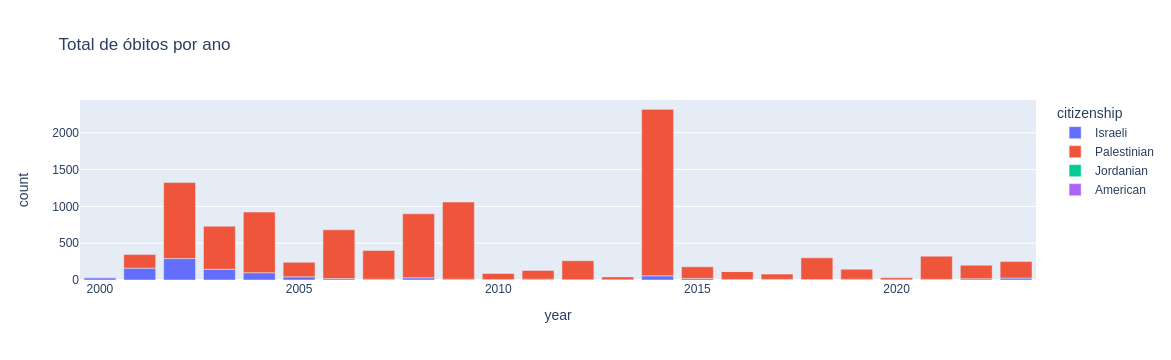

In [38]:
new_df['date_of_death'] = pd.to_datetime(new_df['date_of_death'])
new_df["year"] = new_df['date_of_death'].dt.year.copy()

total_deaths_by_citizenship = new_df.groupby("year")["citizenship"].value_counts()
dataframe = pd.DataFrame(total_deaths_by_citizenship).reset_index()

fig_total_deaths = px.bar(dataframe, x='year', y="count",
                          color='citizenship', title='Total de óbitos por ano')
fig_total_deaths.show()

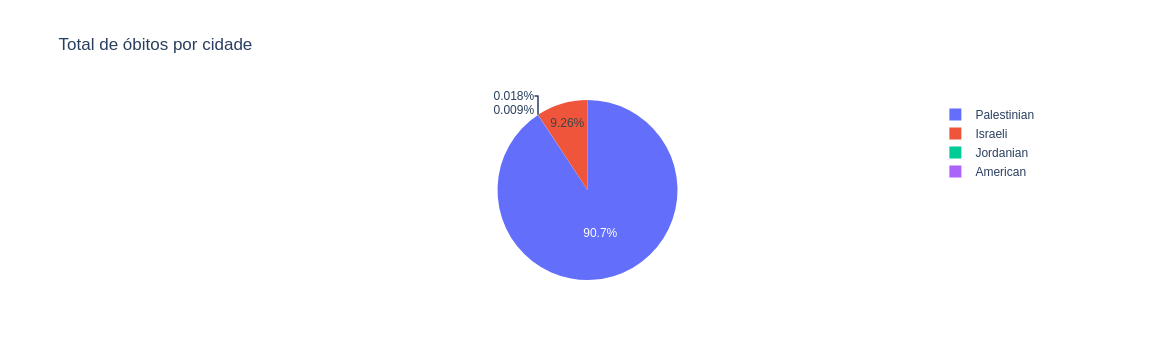

In [37]:
data = new_df.groupby("citizenship")["date_of_death"].count()
group_filteted = pd.DataFrame(data)
fig_total_deaths = px.pie(group, values="date_of_death", 
                          names=["American", "Israeli", "Jordanian", "Palestinian"],
                          title="Total de óbitos por cidade")
fig_total_deaths.show()